In [28]:
# Importing the libraries
import pandas as pd
import numpy as np

In [29]:
# Importing the dataset
!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/Salary_Data.csv?raw=true" -O Salary_Data.csv

dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values


--2025-07-01 02:34:33--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/Salary_Data.csv?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/Salary_Data.csv [following]
--2025-07-01 02:34:34--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/Salary_Data.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/Salary_Data.csv [following]
--2025-07-01 02:34:34--  https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubus

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [11]:
m = len(X)

In [12]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

[9449.96232146] [25792.20019867]


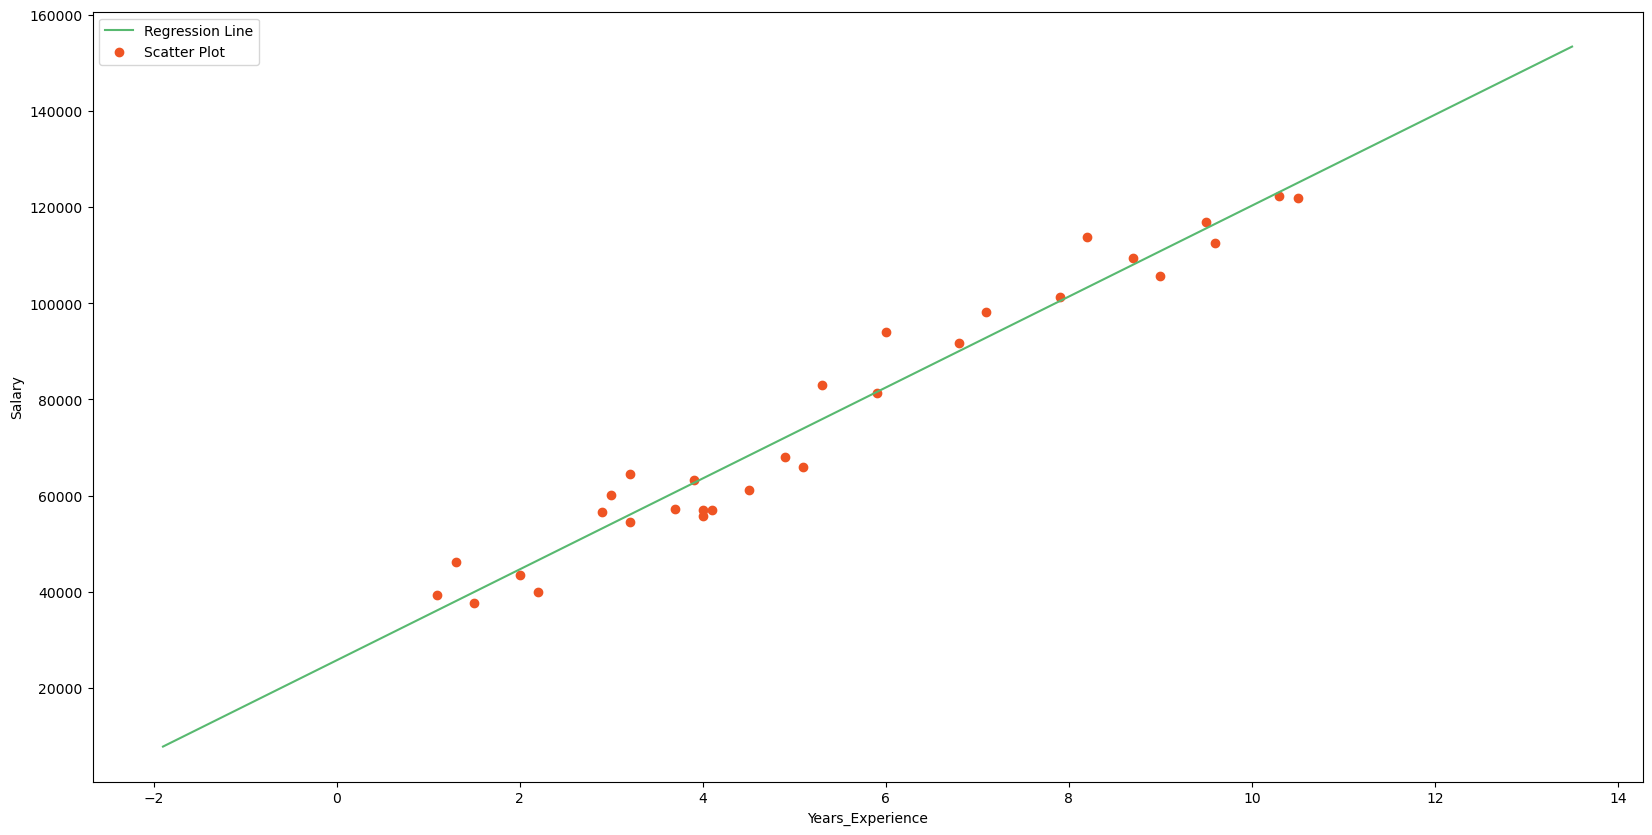

In [16]:
# Plotting Values and Regression Line
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

max_x = np.max(X) + 3
min_x = np.min(X) - 3

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [17]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

[5592.04360876]


In [18]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

[0.95695666]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

5592.043608760662
0.9569566641435086


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [26]:
# Predicting the Test set results
#y_pred = regressor.predict(X_test)

In [27]:
# Finding the R-Squared value for this model
print(regressor.score(X_test, y_test))


0.988169515729126
